In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Part (a): Generate 20 random data points within the range [-30, 30]
N = 20
x1 = np.random.randint(-30, 31, N)  # Random integers for x1
x2 = np.random.randint(-30, 31, N)  # Random integers for x2
X = np.column_stack((x1, x2))  # Combine x1 and x2 into pairs of (x1, x2)
X

array([[  5, -18],
       [-11, -24],
       [-11,   3],
       [ -6,  16],
       [  5,  -9],
       [ -2, -30],
       [-25,  11],
       [-14, -12],
       [ 30, -14],
       [-21,  -5],
       [-30, -22],
       [ 15, -12],
       [  8,  -8],
       [-11,   3],
       [-29,  30],
       [ 11,  -5],
       [-16,  25],
       [-30, -29],
       [ 21,  10],
       [  0, -22]])

In [108]:
# Part (b): Define the target function f(x1, x2) = x1 + 2*x2 - 1.5 = 0
y = np.sign(x1 + 2 * x2 - 1.5)
y

array([-1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1.,  1., -1.,  1., -1.,  1., -1.])

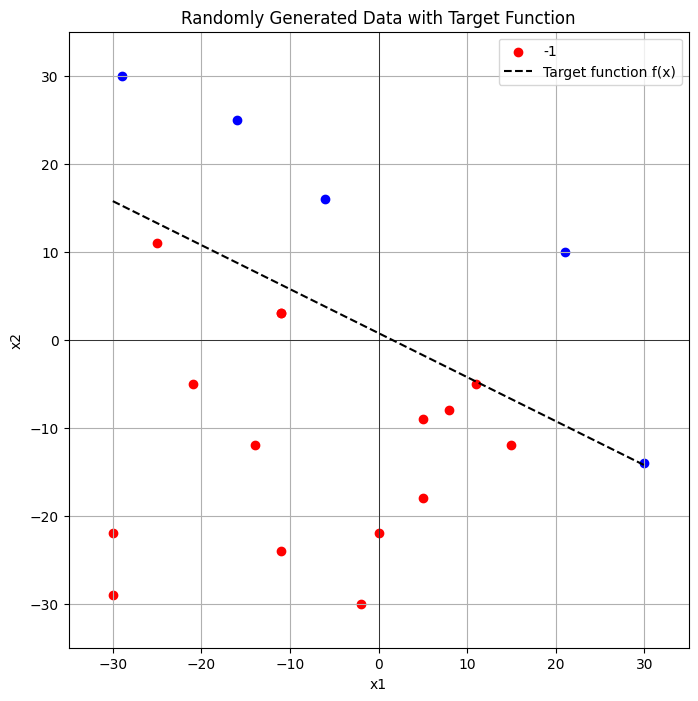

In [109]:
# Part (c): Plot the points on the 2D plane, labeling them with color (Blue for +1, Red for -1)
plt.figure(figsize=(8, 8))

for i in range(N):
    if y[i] == 1:
        plt.scatter(X[i, 0], X[i, 1], color='blue', label='+1' if i == 0 else "")  # Blue for +1
    else:
        plt.scatter(X[i, 0], X[i, 1], color='red', label='-1' if i == 0 else "")  # Red for -1

# Plot the target function line: x1 + 2*x2 - 1.5 = 0
x_vals = np.linspace(-30, 30, 100)  # X-axis values
y_vals = (-x_vals + 1.5) / 2  # Corresponding y-axis values from the target function
plt.plot(x_vals, y_vals, 'k--', label='Target function f(x)')

# Set plot labels, legend, and grid
plt.xlim([-35, 35])
plt.ylim([-35, 35])
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Randomly Generated Data with Target Function')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


In [110]:
# Plot decision boundary for trained the perceptron
def plot_decision_boundary(X, y, w, b, iteration):
    plt.figure(figsize=(8, 8))
    
    # Plot points
    for i in range(N):
        if y[i] == 1:
            plt.scatter(X[i, 0], X[i, 1], color='blue')
        else:
            plt.scatter(X[i, 0], X[i, 1], color='red')

    # Plot target function
    x_vals = np.linspace(-30, 30, 100)
    y_vals = (-x_vals + 1.5) / 2
    plt.plot(x_vals, y_vals, 'k--', label='Target function')
    
    # Plot perceptron decision boundary (w1 * x1 + w2 * x2 + b = 0)
    y_perceptron = (-w[0] * x_vals - b) / w[1]
    plt.plot(x_vals, y_perceptron, 'g-', label=f'Iteration {iteration}')
    
    plt.xlim([-35, 35])
    plt.ylim([-35, 35])
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Perceptron Decision Boundary - Iteration {iteration} Weight {w}, Bias {b}')
    plt.legend()
    plt.grid(True)
    plt.show()

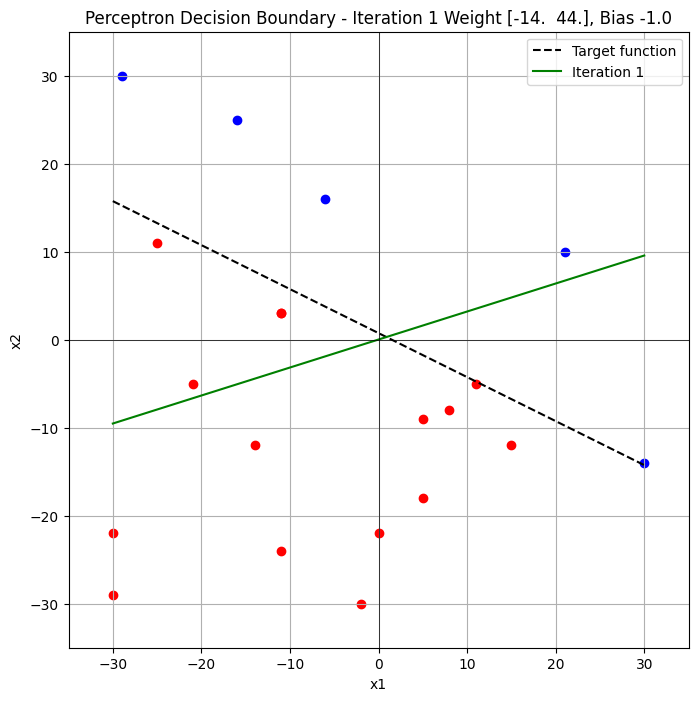

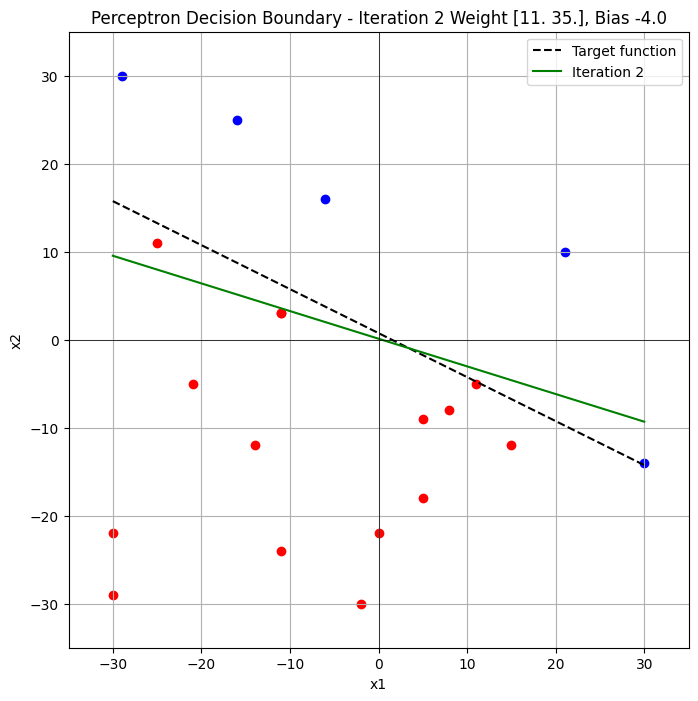

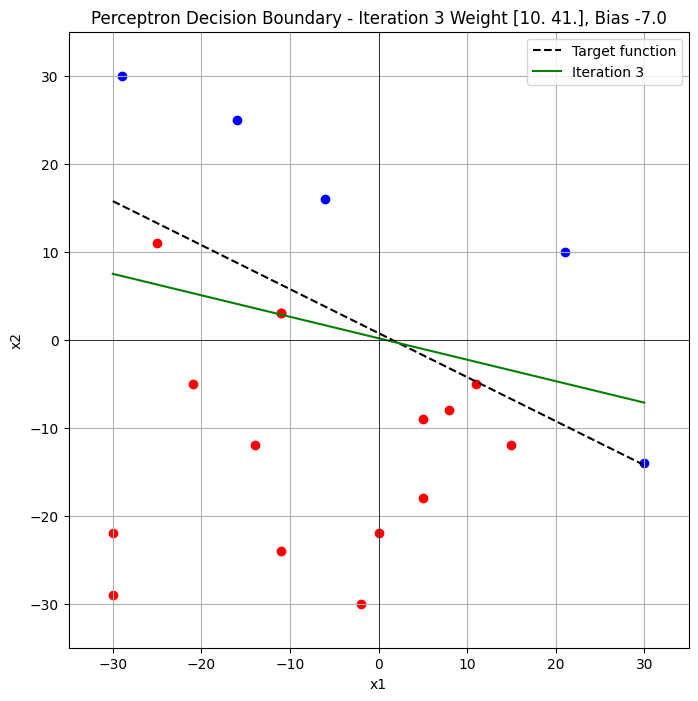

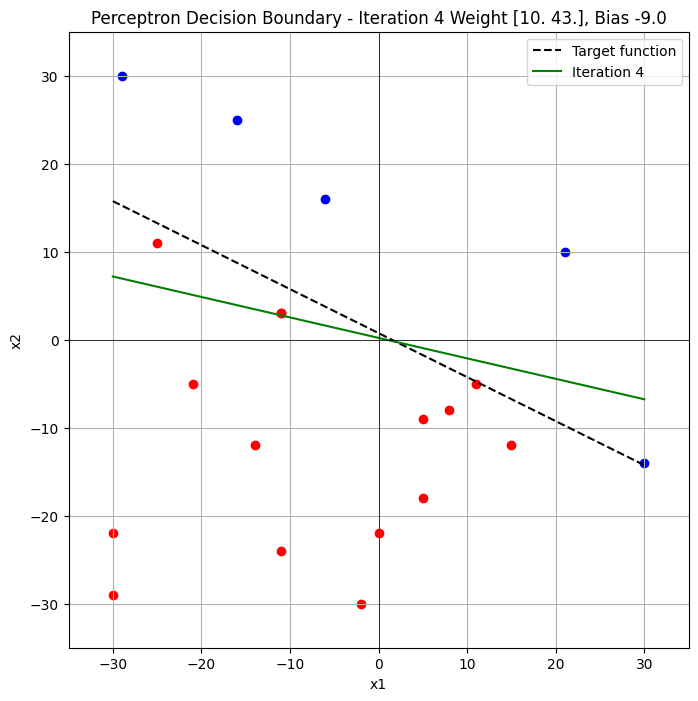

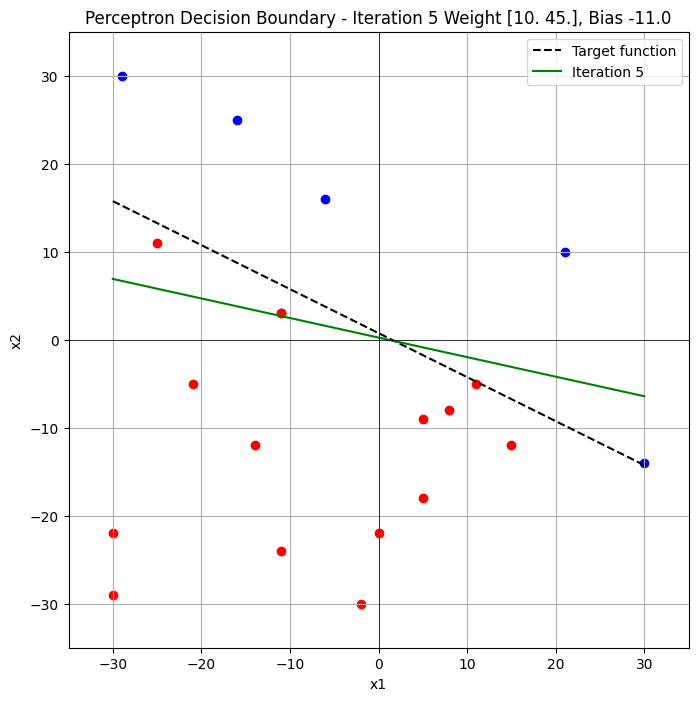

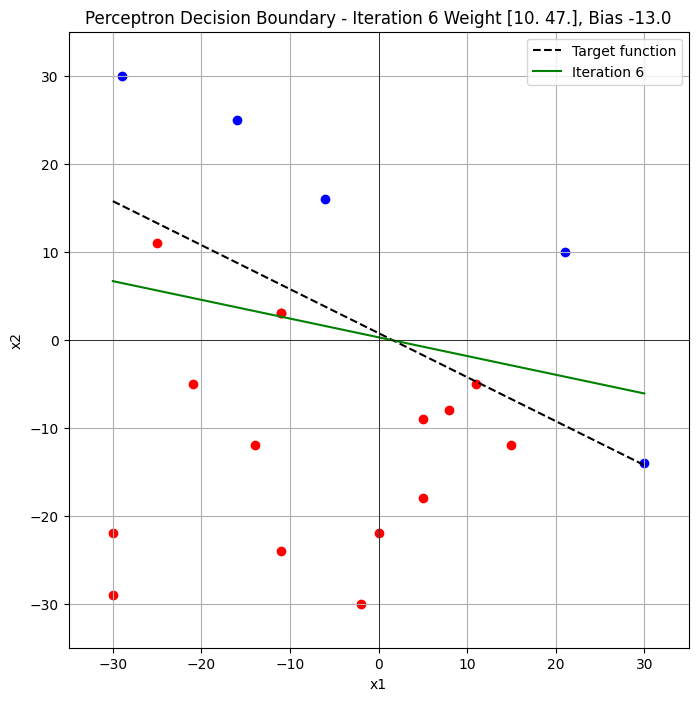

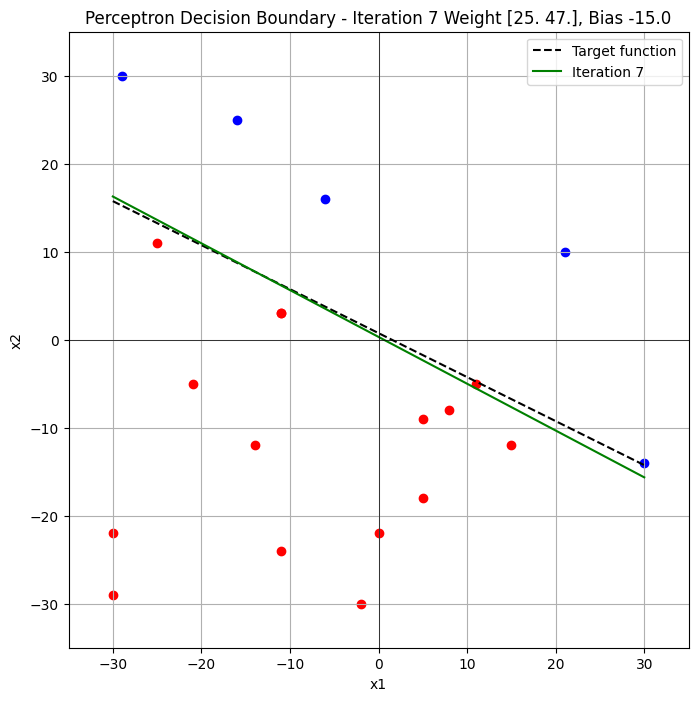

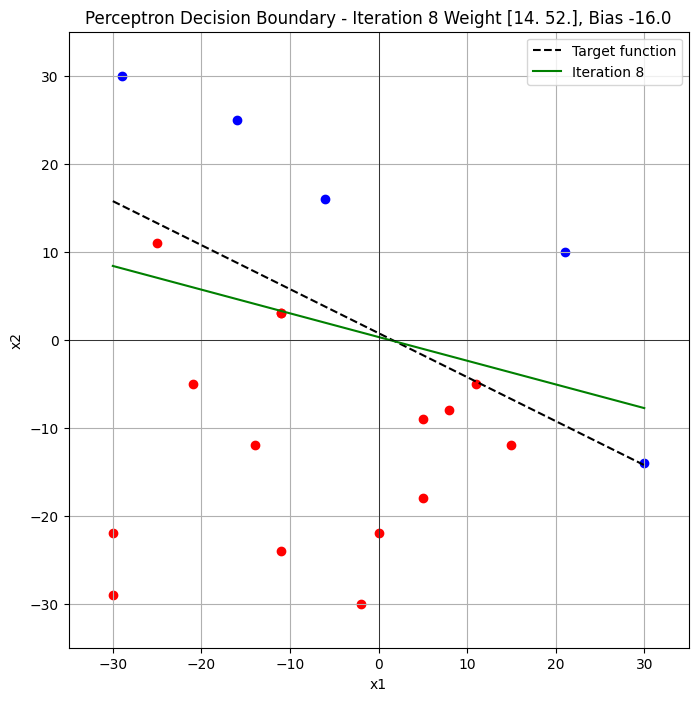

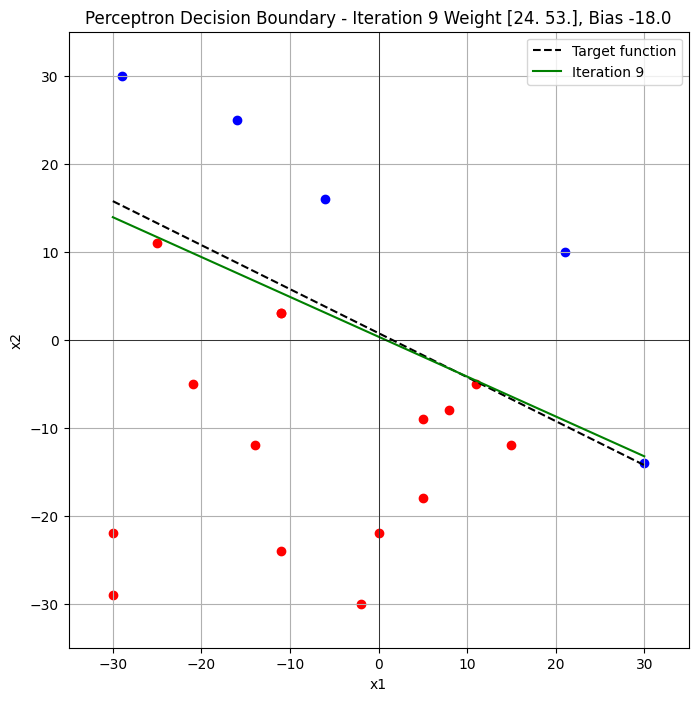

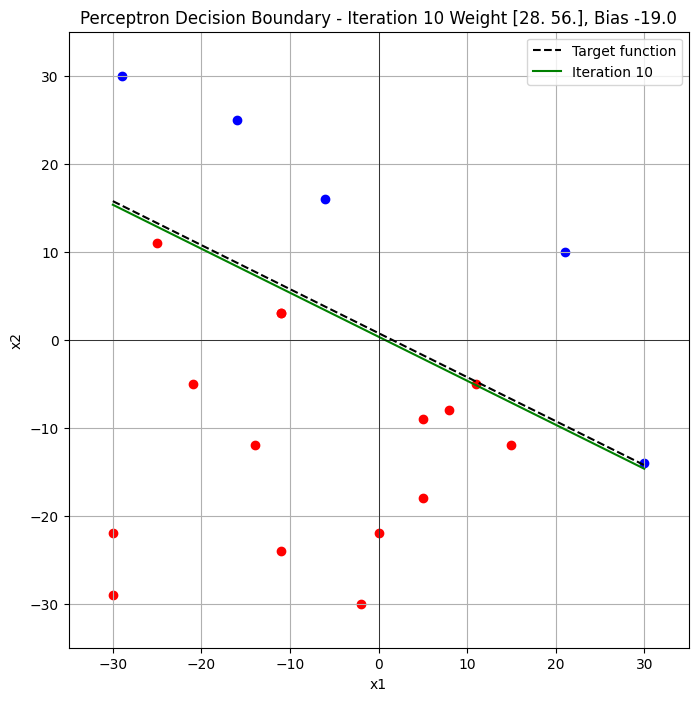

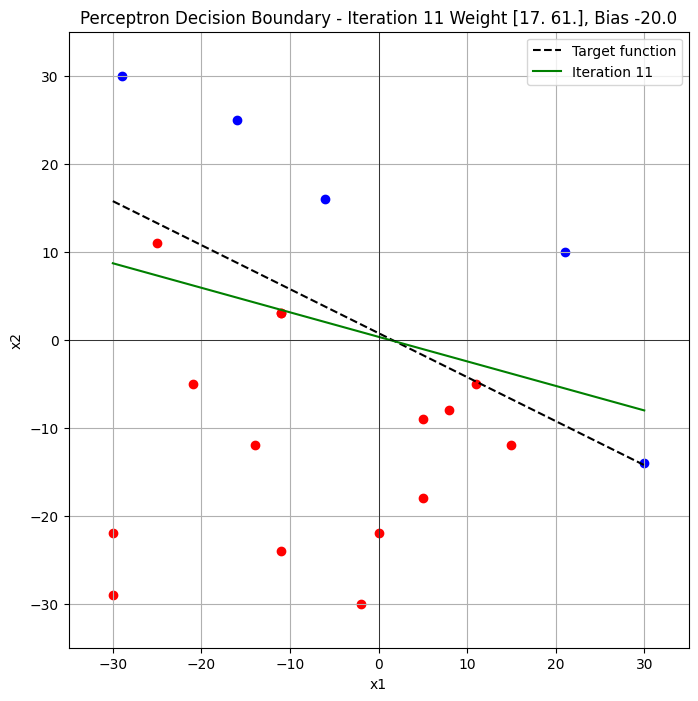

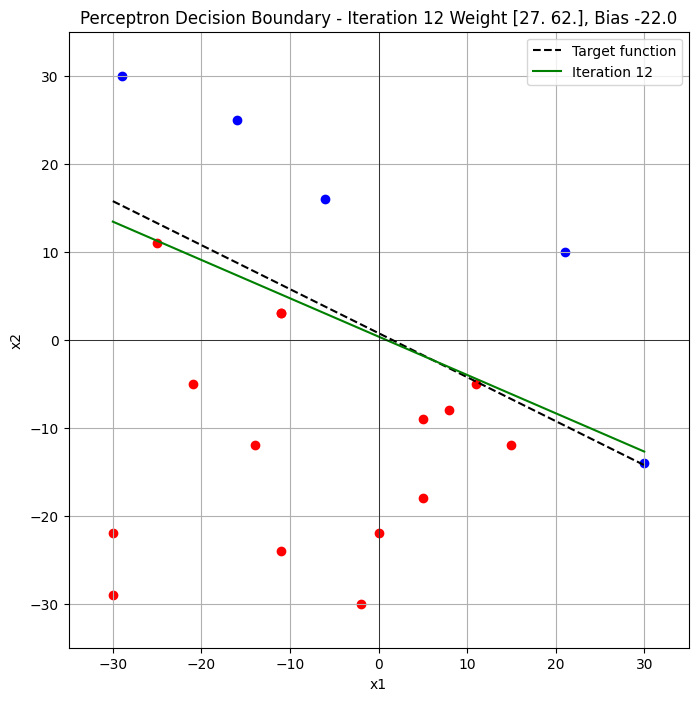

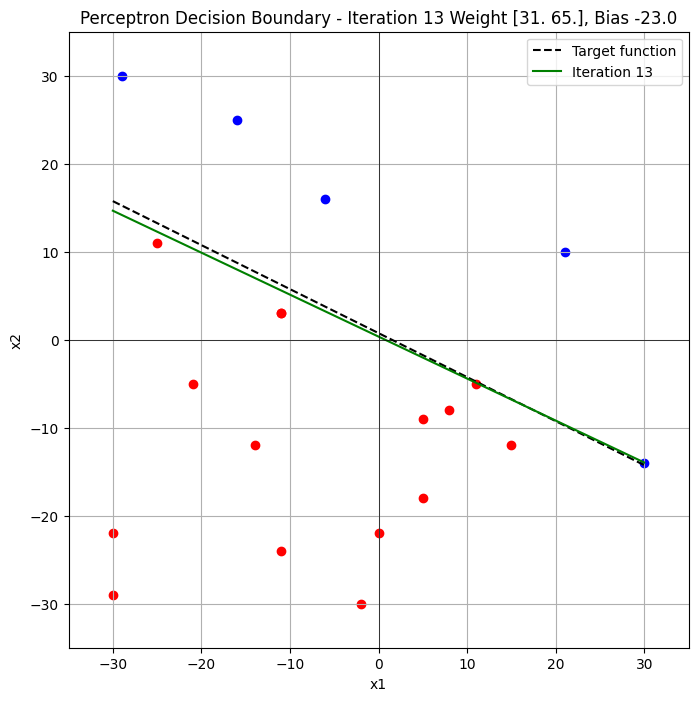

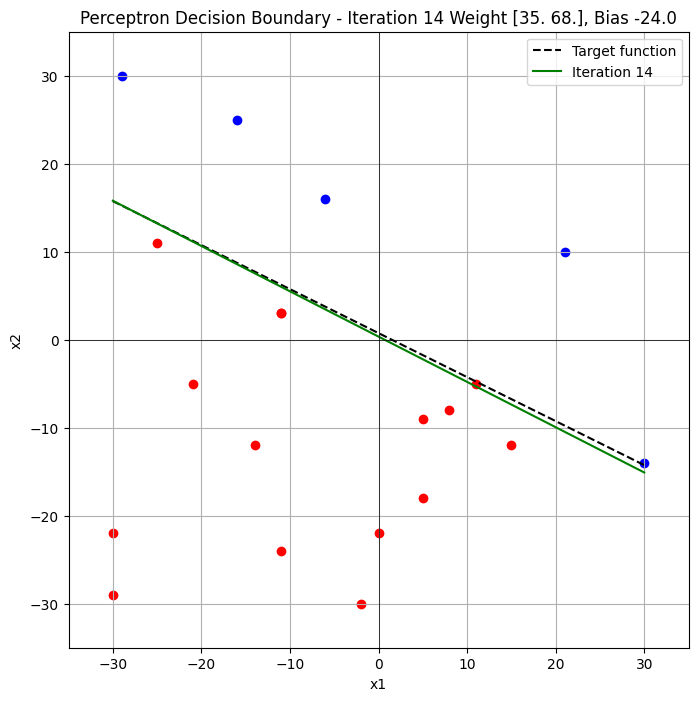

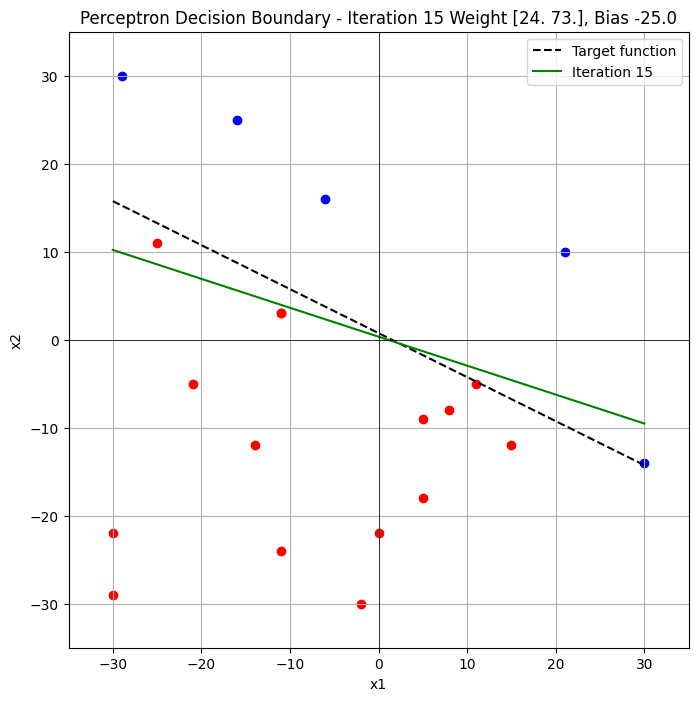

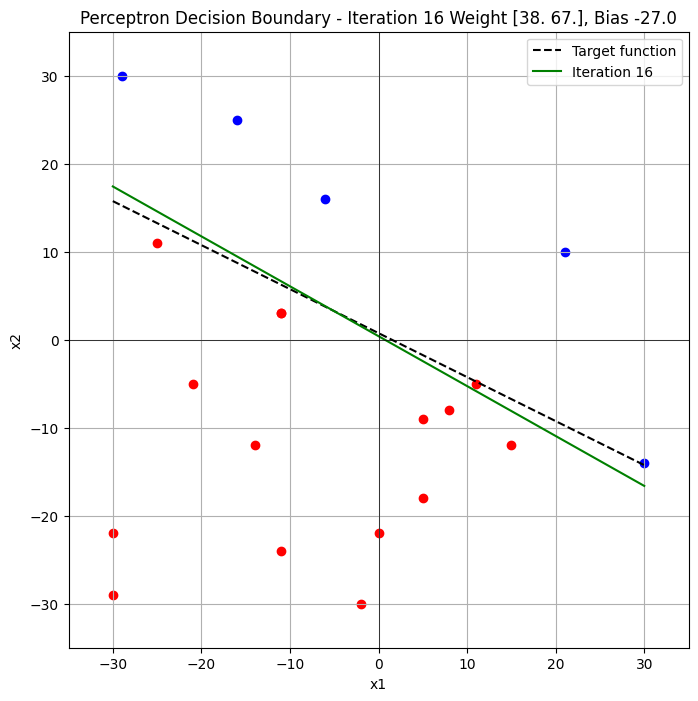

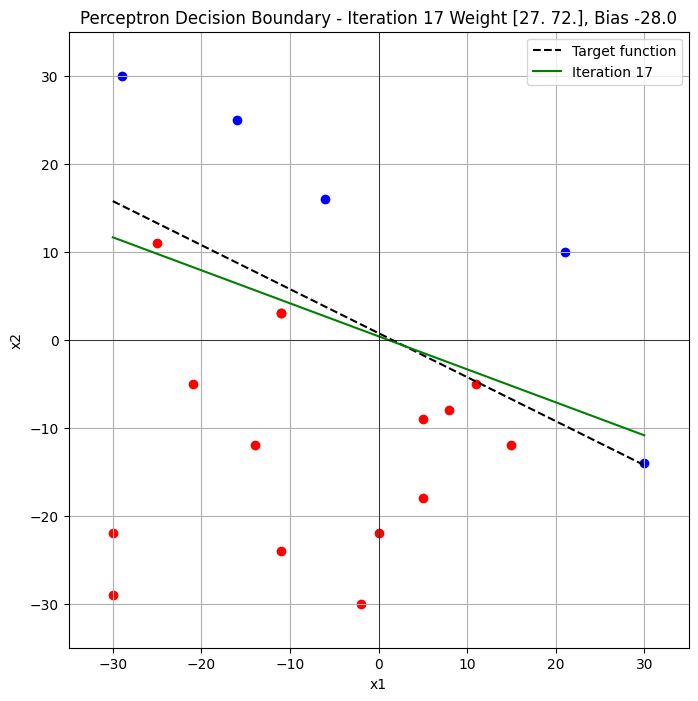

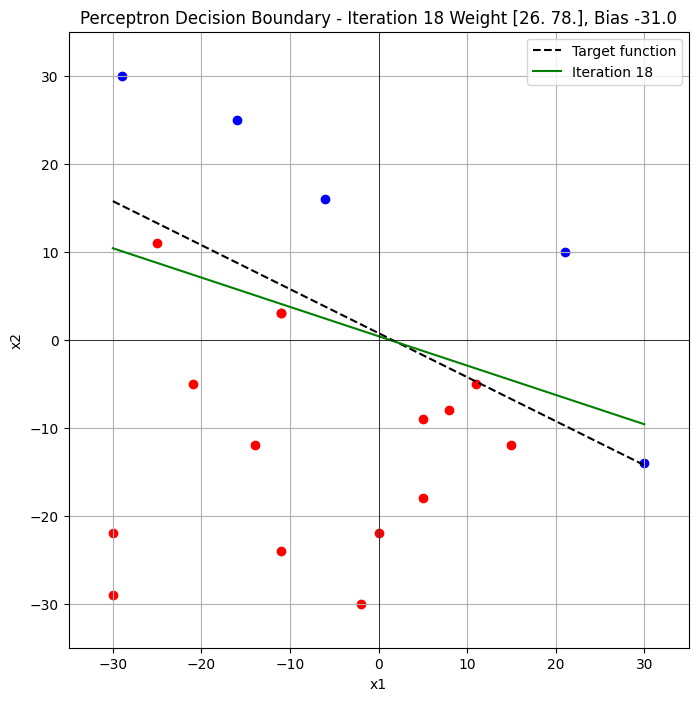

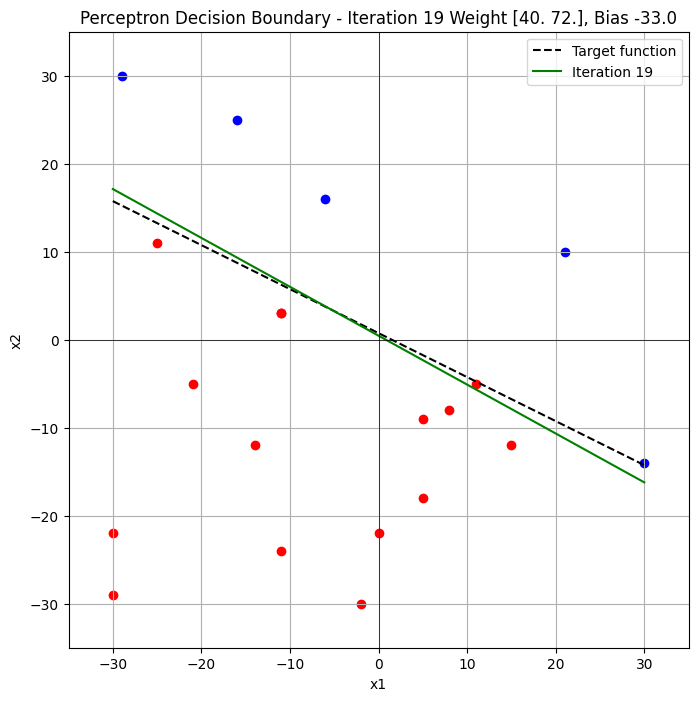

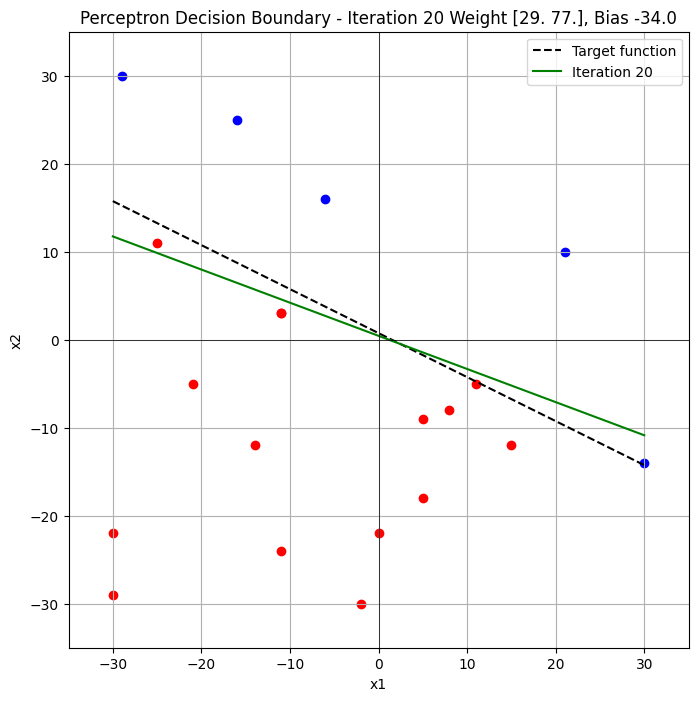

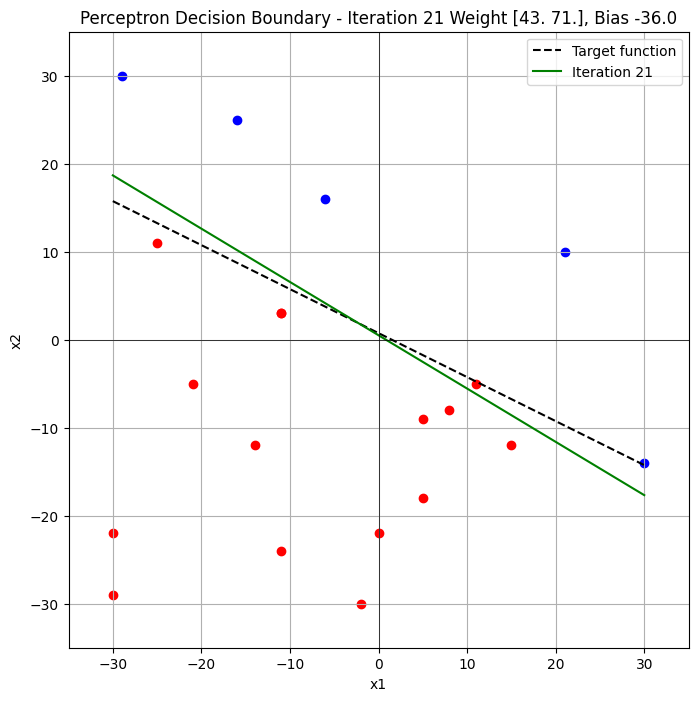

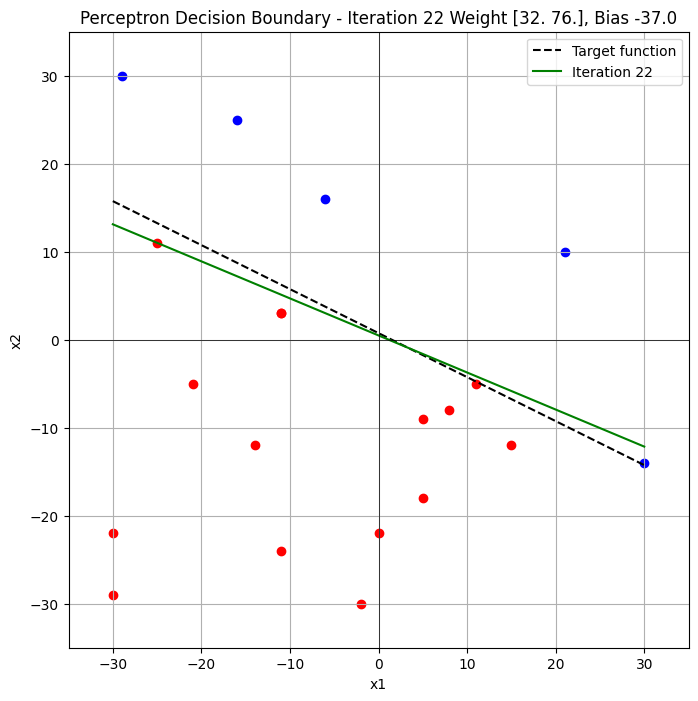

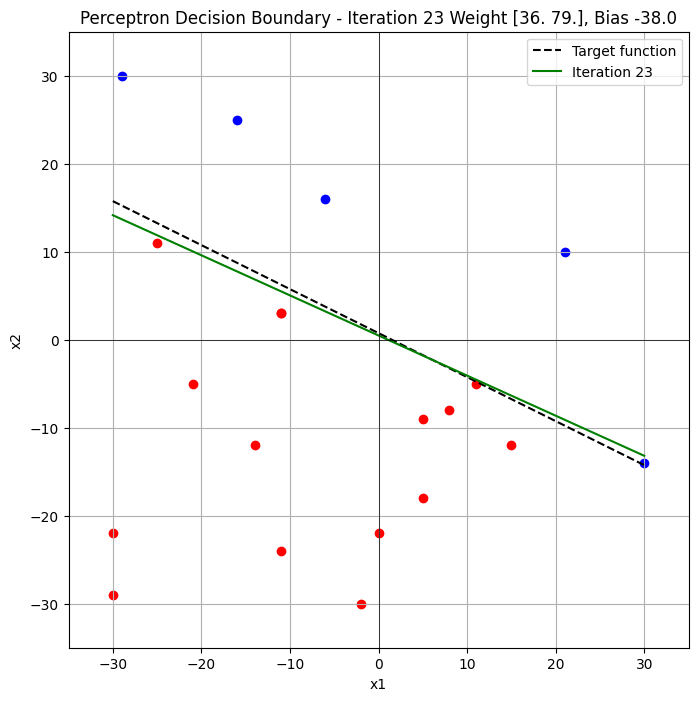

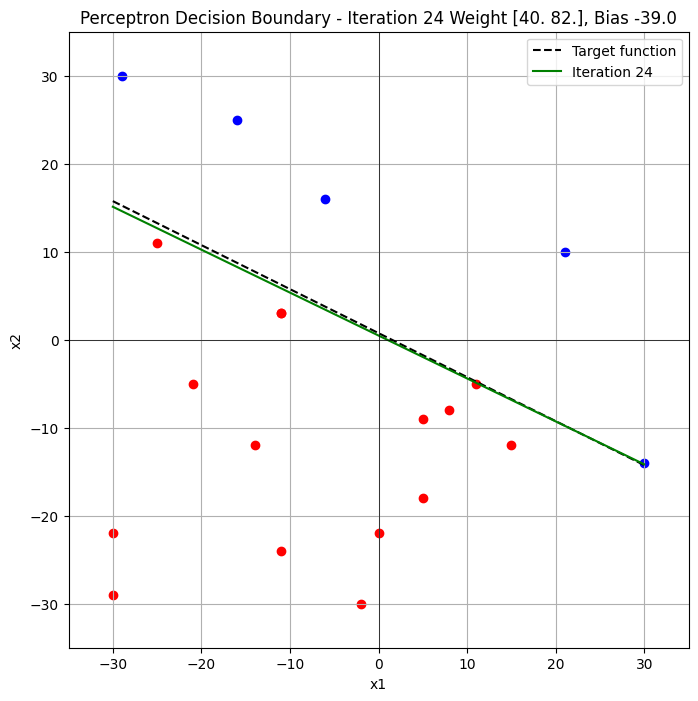

Perceptron converged in 25 iterations


In [113]:
# Part (d): Perceptron func.
def perceptron(X, y, epochs=1000, learning_rate=1.0):
    # Initialize weights (w) and bias (b) to zero
    w = np.zeros(2)
    b = 0
    iterations = 0
    for epoch in range(epochs):
        error_count = 0
        for i in range(N):
            # Predict the label
            y_pred = np.sign(np.dot(w, X[i]) + b)
            # If the prediction is incorrect, update weights and bias
            if (y_pred == 0 and y[i] == -1): # y_pred ≤ 0 (z≤0)
                continue
            elif (y_pred != y[i]): # All unequal equations except y_pred = 0 and y = -1 (z≤0)
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
                error_count += 1
        iterations += 1
        if error_count == 0:
            break
        plot_decision_boundary(X, y, w, b, iterations)
    return w, b, iterations

# Train the perceptron model
w, b, iterations = perceptron(X, y)
print(f"Perceptron converged in {iterations} iterations")


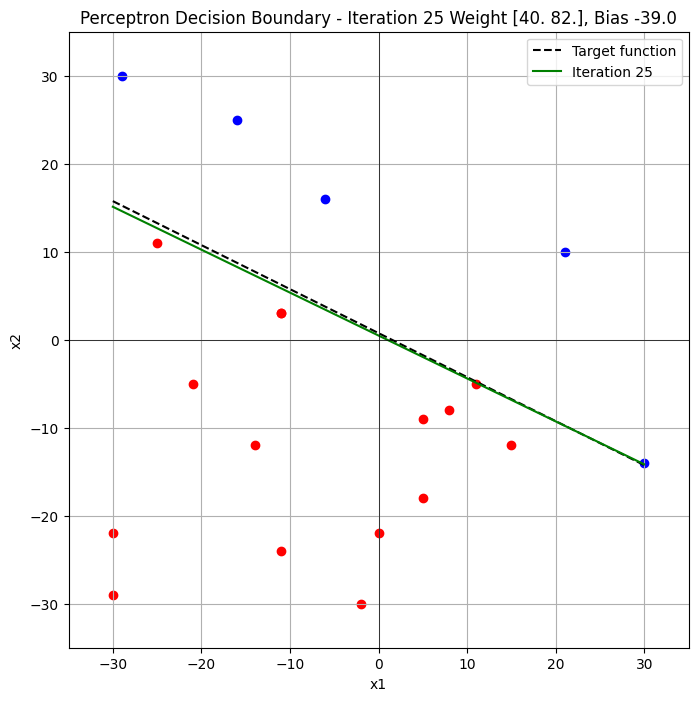

In [115]:
# Plot the final decision boundary
plot_decision_boundary(X, y, w, b, iterations)


In [105]:
# Explanation:
#The perceptron algorithm iterates over the data points, updating weights and bias until it separates the points correctly.
#Different iterations may produce different decision boundaries due to the initialization and update rules.
# The final decision boundary will not exactly match the target function, as the perceptron may converge to a slightly different 
# solution depending on the data points and their separability.